In [1]:
from scipy.integrate import odeint
from numpy import arange, zeros, roll, concatenate, sin, pi

Calculate first derivative in x using central differencing

$$\left.\frac{\partial f}{\partial x}\right|_{x_n} \simeq \frac{f\left(x_{n+1}\right) - f\left(x_{n-1}\right)}{2\Delta x}$$

In [2]:
def ddx(f, dx):
    "Differentiate f(x) with constant mesh spacing dx"
    return (roll(f, -1) - roll(f, 1))/(2.*dx)


Solve Euler equations for velocity in 1D (x) $U_x$ and pressure $P$, assuming a constant density $\rho$:

$$\frac{\partial U_x}{\partial t} + U_x\frac{\partial U_x}{\partial x} = -\frac{1}{\rho}\frac{\partial P}{\partial x}$$
$$\frac{\partial P}{\partial t} + U_x\frac{\partial P}{\partial x} = -\gamma P \frac{\partial U_x}{\partial x}$$

where $\gamma$ is the ratio of specific heats. The sound speed is

$$c_s = \sqrt{\gamma P / \rho}$$

In [3]:
length = 1.0
N = 50
x = length * arange(N)/N

density = 1.0
gamma = 5./3

def pv_equations(f, time): 
    """Calculate time derivatives for velocity in x, Ux, 
       and pressure P. f = [Ux, P]"""
    N = len(f)//2    # Number of mesh points in X
    dx = length / N  # Mesh spacing
    Ux = f[:N] # First half is velocity in X
    P = f[N:]  # Second half is pressure
    
    # Velocity equation
    dUx_dt = -Ux*ddx(Ux, dx) - ddx(P, dx)/density
    # Pressure equation
    dP_dt = -Ux*ddx(P, dx) - gamma*P*ddx(Ux, dx)
    
    return concatenate([dUx_dt, dP_dt])

In [15]:
# Initial conditions
P = 3./5 + 0.1*sin(2*pi*x)  # Note: 3/5 makes cs = 1
Ux = zeros(x.shape)

In [16]:
# Note: oscillation period = length / cs = 1
times = [0.0, 0.25, 0.5, 0.75, 1.0]
result = odeint(pv_equations, concatenate([Ux, P]), times)

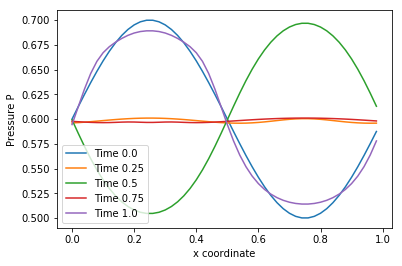

In [17]:
import matplotlib.pyplot as plt

for tindex, time in enumerate(times):
    Ux = result[tindex, :N]
    P = result[tindex, N:]
    plt.plot(x, P, label="Time {}".format(time))
plt.legend()
plt.xlabel("x coordinate")
plt.ylabel("Pressure P")
plt.show()

After a time period of 1, the pressure perturbation is (approximately) back where it started. 